Q1. (Why HD Vectors?) Representing information using high dimensional vectors comes with several advantages:
1. We can theoretically represent 2^N objects. When N is large, we see that this paradigm is capable of representing a large amount of information.
2. We can store information in a highly distributed manner. A random pair of HD vectors are very likely to be orthogonal or approximately orthogonal. The implication of this is that new information represented using a random HD vector is very likely to be unrelated to information previously stored. We can conclude that similar vectors are extremely likely to have semantic relation as well.

------------------------------
Q2: Plotting Cosine similarity
------------------------------

The entries of the random vectors are essentially generated by Bernoulli trials. This explains why the the histogram of the cosine similarities of random vectors fit the normal curve. As we can see most of the random vectors are orthogonal or close to orthogonal.

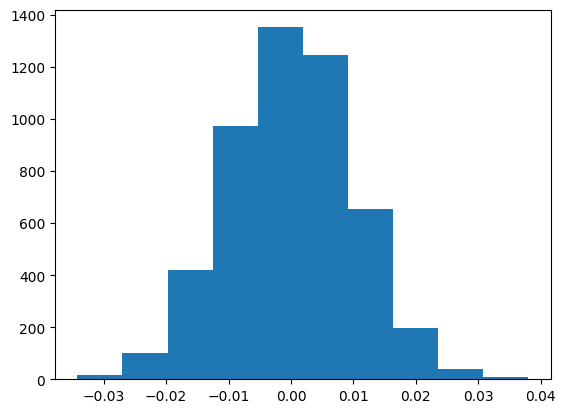

In [ ]:
import random
from multiprocessing import Pool
from numpy import dot
from numpy.linalg import norm
import matplotlib.pyplot as plt


def generate_cs_on_vector_pair(N):
    vector1 = [random.choice([-1, 1]) for _ in range(N)]
    vector2 = [random.choice([-1, 1]) for _ in range(N)]
    cs = dot(vector1, vector2)/(norm(vector1)*norm(vector2))
    return cs

def generate_cs(N, num_vectors):
    pool = Pool()
    vectors = pool.map(generate_cs_on_vector_pair, [N] * num_vectors)
    pool.close()
    pool.join()
    return vectors

#a = generate_cs(10, 2000)
#b = generate_cs(100, 2000)
#c = generate_cs(1000, 2000)
d = generate_cs(10000, 5000)

plt.hist(d)
plt.show()





-------------------------------
Q3: Basic HD Vector Operations
-------------------------------

(I wasn't quite sure what part (c) was asking but this is my best guess, I interpreted '+' as bundle).


<function matplotlib.pyplot.show(close=None, block=None)>

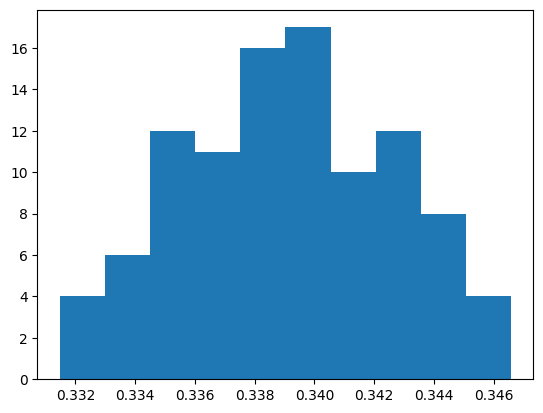

In [ ]:
import numpy as np

def bind(v1, v2):
  return np.multiply(v1, v2)

def bundle(v1, v2):
  return np.add(v1, v2)

def permute(v1):
  return np.roll(v1, 1, axis=None)



similarities = []
for _ in range(100):
  codebook = []
  for i in range(5):
    v = [random.choice([-1, 1]) for _ in range(10000)]
    codebook.append(v)

  z = bundle(codebook[0], codebook[0])
  z = bundle(z, codebook[0])
  z = bundle(z, codebook[1])
  z = bundle(z, codebook[1])
  z = bundle(z, codebook[2])
  z = bundle(z, codebook[2])

  cosinesims = []
  for code in codebook:
    cosinesims.append(dot(z, code)/(norm(z)*norm(code)))

  similarities.append(np.mean(cosinesims))

plt.hist(similarities)
plt.show

The average similarity between the bundled vector and the vectors from which it is composed is about 33%. Combined with the graph from the previous question which shows that HD vectors are generally dissimilar, we see that binding preserves similarity~

---------------------------------
# Manish Subramaniam, 6/13/2023, for Neurosci299 Assignment 1
----------------------------------